# Deep Learning Models Training and Hyperparameter Tuning
## Fraud Detection - Deep Learning Models

**Objective:** Train and evaluate 6 Deep Learning models for fraud detection

**Models:**
1. Feedforward Neural Network (FNN)
2. 1D Convolutional Neural Network (CNN)
3. Long Short-Term Memory (LSTM)
4. Bidirectional LSTM (BiLSTM)
5. CNN-BiLSTM Hybrid (Combined)
6. Autoencoder (Anomaly Detection)

**Workflow:**
- Load prepared datasets
- Build DL architectures
- Train baseline models
- Evaluate performance
- Hyperparameter tuning
- Compare results
- Save best models

---

## 1. Import Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Dense, Dropout, BatchNormalization,
    Conv1D, MaxPooling1D, Flatten,
    LSTM, Bidirectional, Input
)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

# Utils
import json
import os
from datetime import datetime

print("Libraries imported successfully")
print(f"TensorFlow version: {tf.__version__}")
print(f"Training started at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Libraries imported successfully
TensorFlow version: 2.18.1
Training started at: 2025-10-09 21:24:37


## 2. Load Datasets

In [ ]:
print("="*80)
print("LOADING DATASETS FOR DEEP LEARNING MODELS")
print("="*80)

# Define data directory (CORRECTED PATH)
data_dir = '../../data/processed_data'

print("\nDeep Learning Dataset Strategy:")
print("  - Neural networks require SCALED features for optimal training")
print("  - Options: StandardScaler (mean=0, std=1) or MinMaxScaler (0-1 range)")
print("  - Can use SMOTE-balanced versions for better class balance")

# Load scaled datasets (for deep learning)
print("\nLoading SCALED datasets (StandardScaler)...")
X_train_scaled = pd.read_csv(f'{data_dir}/X_train_scaled.csv')
y_train = pd.read_csv(f'{data_dir}/y_train.csv').values.ravel()

X_train_smote_scaled = pd.read_csv(f'{data_dir}/X_train_smote_scaled.csv')
y_train_smote = pd.read_csv(f'{data_dir}/y_train_smote.csv').values.ravel()

X_val_scaled = pd.read_csv(f'{data_dir}/X_val_scaled.csv')
y_val = pd.read_csv(f'{data_dir}/y_val.csv').values.ravel()

X_test_scaled = pd.read_csv(f'{data_dir}/X_test_scaled.csv')
y_test = pd.read_csv(f'{data_dir}/y_test.csv').values.ravel()

print("  - StandardScaler datasets loaded:")
print(f"    X_train_scaled: {X_train_scaled.shape}")
print(f"    X_train_smote_scaled: {X_train_smote_scaled.shape}")
print(f"    X_val_scaled: {X_val_scaled.shape}")
print(f"    X_test_scaled: {X_test_scaled.shape}")

# Alternative: Load MinMax scaled datasets (without SMOTE)
print("\nLoading ALTERNATIVE MinMaxScaler datasets...")
X_train_minmax = pd.read_csv(f'{data_dir}/X_train_minmax.csv')
X_val_minmax = pd.read_csv(f'{data_dir}/X_val_minmax.csv')
X_test_minmax = pd.read_csv(f'{data_dir}/X_test_minmax.csv')

print("  - MinMaxScaler datasets loaded:")
print(f"    X_train_minmax: {X_train_minmax.shape}")
print(f"    X_val_minmax: {X_val_minmax.shape}")
print(f"    X_test_minmax: {X_test_minmax.shape}")
print("  Note: SMOTE MinMax datasets not available, use StandardScaler SMOTE instead")

# Choose primary dataset for training (StandardScaler recommended)
X_train = X_train_scaled
X_train_smote = X_train_smote_scaled
X_val = X_val_scaled
X_test = X_test_scaled

print(f"\nPRIMARY DATASETS (StandardScaler chosen):")
print(f"  • Features: {X_train.shape[1]} optimized features")
print(f"  • Training samples: {len(X_train):,} (original), {len(X_train_smote):,} (with SMOTE)")
print(f"  • Validation samples: {len(X_val):,}")
print(f"  • Test samples: {len(X_test):,}")

# Get input dimension for neural networks
input_dim = X_train.shape[1]
print(f"\nNeural Network Input Shape: {input_dim} features")

# Class distribution analysis
print(f"\nClass Distribution:")
print(f"  Original Training:")
print(f"    Normal (0): {(y_train == 0).sum():,} ({(y_train == 0).sum() / len(y_train) * 100:.1f}%)")
print(f"    Fraud (1):  {(y_train == 1).sum():,} ({(y_train == 1).sum() / len(y_train) * 100:.1f}%)")
print(f"  SMOTE Training:")
print(f"    Normal (0): {(y_train_smote == 0).sum():,} ({(y_train_smote == 0).sum() / len(y_train_smote) * 100:.1f}%)")
print(f"    Fraud (1):  {(y_train_smote == 1).sum():,} ({(y_train_smote == 1).sum() / len(y_train_smote) * 100:.1f}%)")

# Calculate class weights for imbalanced learning
class_weight_ratio = (y_train == 0).sum() / (y_train == 1).sum()
class_weights = {0: 1.0, 1: class_weight_ratio}
print(f"\nClass Weights (for imbalanced training): {class_weights}")

print(f"\nDeep Learning datasets ready!")
print("Choose between SMOTE-balanced or class-weighted training approaches.")

LOADING DATASETS FOR DEEP LEARNING MODELS

🧠 Deep Learning Dataset Strategy:
  📊 Neural networks require SCALED features for optimal training
  🎯 Options: StandardScaler (mean=0, std=1) or MinMaxScaler (0-1 range)
  ⚖️ Can use SMOTE-balanced versions for better class balance

📊 Loading SCALED datasets (StandardScaler)...
  ✅ StandardScaler datasets loaded:
    X_train_scaled: (56296, 63)
    X_train_smote_scaled: (97732, 63)
    X_val_scaled: (12063, 63)
    X_test_scaled: (12064, 63)

🔄 Loading ALTERNATIVE MinMaxScaler datasets...
  ✅ StandardScaler datasets loaded:
    X_train_scaled: (56296, 63)
    X_train_smote_scaled: (97732, 63)
    X_val_scaled: (12063, 63)
    X_test_scaled: (12064, 63)

🔄 Loading ALTERNATIVE MinMaxScaler datasets...
  ✅ MinMaxScaler datasets loaded:
    X_train_minmax: (56296, 63)
    X_val_minmax: (12063, 63)
    X_test_minmax: (12064, 63)
  ⚠️ Note: SMOTE MinMax datasets not available, use StandardScaler SMOTE instead

🎯 PRIMARY DATASETS (StandardScaler cho

## 3. Helper Functions

In [9]:
def evaluate_dl_model(model, X_val, y_val, model_name, threshold=0.5):
    """
    Evaluate deep learning model performance with enhanced metrics
    """
    from sklearn.metrics import average_precision_score
    
    print(f"\nEvaluating {model_name}...")
    
    # Predictions
    y_pred_proba = model.predict(X_val, verbose=0).flatten()
    y_pred = (y_pred_proba > threshold).astype(int)
    
    # Calculate metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, zero_division=0)
    recall = recall_score(y_val, y_pred, zero_division=0)
    f1 = f1_score(y_val, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_val, y_pred_proba)
    
    # Enhanced metrics for imbalanced data
    pr_auc = average_precision_score(y_val, y_pred_proba)
    
    # Confusion matrix and specificity
    cm = confusion_matrix(y_val, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    # Print results
    print(f"Accuracy:    {accuracy:.4f}")
    print(f"Precision:   {precision:.4f}")
    print(f"Recall:      {recall:.4f}")
    print(f"F1-Score:    {f1:.4f}")
    print(f"ROC-AUC:     {roc_auc:.4f}")
    print(f"PR-AUC:      {pr_auc:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"Threshold:   {threshold:.4f}")
    
    print(f"\nConfusion Matrix:")
    print(cm)
    print(f"  TN: {tn:,} | FP: {fp:,}")
    print(f"  FN: {fn:,} | TP: {tp:,}")
    
    # Return metrics
    metrics = {
        'model_name': model_name,
        'accuracy': float(accuracy),
        'precision': float(precision),
        'recall': float(recall),
        'f1_score': float(f1),
        'roc_auc': float(roc_auc),
        'pr_auc': float(pr_auc),
        'specificity': float(specificity),
        'threshold': float(threshold),
        'confusion_matrix': cm.tolist()
    }
    
    return metrics


def find_optimal_threshold(model, X_val, y_val):
    """
    Find threshold that maximizes F1-score
    """
    from sklearn.metrics import precision_recall_curve
    
    y_pred_proba = model.predict(X_val, verbose=0).flatten()
    
    precisions, recalls, thresholds = precision_recall_curve(y_val, y_pred_proba)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)
    
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx] if optimal_idx < len(thresholds) else 0.5
    
    print(f"\n  Optimal threshold: {optimal_threshold:.4f} (F1: {f1_scores[optimal_idx]:.4f})")
    return optimal_threshold


def focal_loss(gamma=2.0, alpha=0.75):
    """
    Focal Loss for handling class imbalance
    Focuses on hard-to-classify examples (fraud cases)
    """
    def focal_loss_fixed(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1 - 1e-7)
        cross_entropy = -y_true * tf.math.log(y_pred)
        weight = alpha * y_true * tf.pow(1 - y_pred, gamma)
        loss = weight * cross_entropy
        return tf.reduce_mean(loss)
    return focal_loss_fixed


def f1_metric(y_true, y_pred):
    """
    Custom F1-score metric for Keras
    """
    from tensorflow.keras import backend as K
    
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true * y_pred, 'float'), axis=0)
    fp = K.sum(K.cast((1 - y_true) * y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true * (1 - y_pred), 'float'), axis=0)
    
    precision = tp / (tp + fp + K.epsilon())
    recall = tp / (tp + fn + K.epsilon())
    f1 = 2 * precision * recall / (precision + recall + K.epsilon())
    return f1


def plot_training_history(history, model_name):
    """
    Plot training history
    """
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Loss
    axes[0].plot(history.history['loss'], label='Train Loss')
    axes[0].plot(history.history['val_loss'], label='Val Loss')
    axes[0].set_title(f'{model_name} - Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    # Accuracy or F1
    if 'f1_metric' in history.history:
        axes[1].plot(history.history['f1_metric'], label='Train F1')
        axes[1].plot(history.history['val_f1_metric'], label='Val F1')
        axes[1].set_title(f'{model_name} - F1 Score')
        axes[1].set_xlabel('Epoch')
        axes[1].set_ylabel('F1 Score')
        axes[1].legend()
        axes[1].grid(alpha=0.3)
    elif 'accuracy' in history.history:
        axes[1].plot(history.history['accuracy'], label='Train Accuracy')
        axes[1].plot(history.history['val_accuracy'], label='Val Accuracy')
        axes[1].set_title(f'{model_name} - Accuracy')
        axes[1].set_xlabel('Epoch')
        axes[1].set_ylabel('Accuracy')
        axes[1].legend()
        axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()


def plot_roc_pr_curves(models_dict, X_val, y_val):
    """
    Plot ROC and Precision-Recall curves for all models
    """
    from sklearn.metrics import roc_curve, precision_recall_curve, average_precision_score
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    colors = plt.cm.Set2(np.linspace(0, 1, len(models_dict)))
    
    for (name, model), color in zip(models_dict.items(), colors):
        y_pred = model.predict(X_val, verbose=0).flatten()
        
        # ROC curve
        fpr, tpr, _ = roc_curve(y_val, y_pred)
        roc_auc = roc_auc_score(y_val, y_pred)
        ax1.plot(fpr, tpr, label=f'{name} (AUC={roc_auc:.3f})', color=color, linewidth=2)
        
        # PR curve
        precision, recall, _ = precision_recall_curve(y_val, y_pred)
        pr_auc = average_precision_score(y_val, y_pred)
        ax2.plot(recall, precision, label=f'{name} (AP={pr_auc:.3f})', color=color, linewidth=2)
    
    # ROC plot formatting
    ax1.plot([0, 1], [0, 1], 'k--', label='Random', linewidth=1.5)
    ax1.set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
    ax1.set_ylabel('True Positive Rate', fontsize=12, fontweight='bold')
    ax1.set_title('ROC Curves - All Models', fontsize=14, fontweight='bold')
    ax1.legend(loc='lower right', fontsize=9)
    ax1.grid(alpha=0.3)
    
    # PR plot formatting
    fraud_ratio = np.sum(y_val) / len(y_val)
    ax2.axhline(y=fraud_ratio, color='k', linestyle='--', label=f'Baseline ({fraud_ratio:.3f})', linewidth=1.5)
    ax2.set_xlabel('Recall', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Precision', fontsize=12, fontweight='bold')
    ax2.set_title('Precision-Recall Curves - All Models', fontsize=14, fontweight='bold')
    ax2.legend(loc='best', fontsize=9)
    ax2.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('dl_roc_pr_curves.png', dpi=300, bbox_inches='tight')
    print("\nROC and PR curves saved: dl_roc_pr_curves.png")
    plt.show()


print("Helper functions defined (Enhanced with Focal Loss, F1 Metric, Optimal Threshold, and ROC/PR Curves)")

Helper functions defined (Enhanced with Focal Loss, F1 Metric, Optimal Threshold, and ROC/PR Curves)


---
## 4. Model Training

### 4.1 Feedforward Neural Network (FNN)

TRAINING FEEDFORWARD NEURAL NETWORK (FNN)

FNN Architecture:


Model: "FNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 128)            │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,969 (78.00 KB)

 Trainable params: 19,521 (76.25 KB)

 Non-trainable params: 448 (1.75 KB)


Training FNN...
Epoch 1/50
Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.6759 - loss: 1.1261 - val_accuracy: 0.8668 - val_loss: 0.4994 - learning_rate: 0.0010
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.6759 - loss: 1.1261 - val_accuracy: 0.8668 - val_loss: 0.4994 - learning_rate: 0.0010
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7857 - loss: 0.9589 - val_accuracy: 0.8660 - val_loss: 0.4601 - learning_rate: 0.0010
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7857 - loss: 0.9589 - val_accuracy: 0.8660 - val_loss: 0.4601 - learning_rate: 0.0010
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8064 - loss: 0.9164 - val_accuracy: 0.8693 - val_loss: 0.4438 - learning_rate: 0.0010
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8064 - loss: 0.9164 - val_accuracy: 0.8693 - val_loss: 0.4438 - learning_rate: 0.0010
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accu

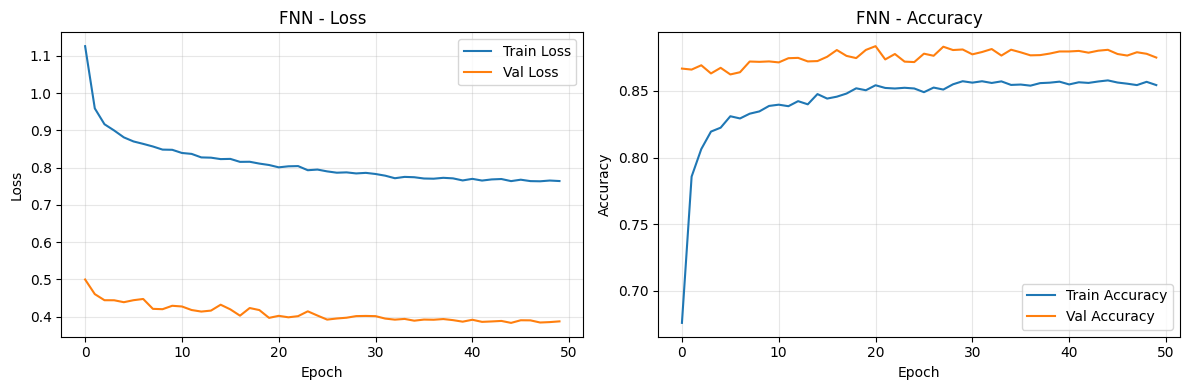


Evaluating FNN...
Accuracy:    0.8809
Precision:   0.5415
Recall:      0.6351
F1-Score:    0.5846
ROC-AUC:     0.8629
PR-AUC:      0.6723
Specificity: 0.9183
Threshold:   0.5000

Confusion Matrix:
[[9615  856]
 [ 581 1011]]
  TN: 9,615 | FP: 856
  FN: 581 | TP: 1,011
Accuracy:    0.8809
Precision:   0.5415
Recall:      0.6351
F1-Score:    0.5846
ROC-AUC:     0.8629
PR-AUC:      0.6723
Specificity: 0.9183
Threshold:   0.5000

Confusion Matrix:
[[9615  856]
 [ 581 1011]]
  TN: 9,615 | FP: 856
  FN: 581 | TP: 1,011


In [10]:
print("="*80)
print("TRAINING FEEDFORWARD NEURAL NETWORK (FNN)")
print("="*80)

# Build FNN model
fnn_model = Sequential([
    Dense(128, activation='relu', input_dim=input_dim),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(16, activation='relu'),
    Dropout(0.2),
    
    Dense(1, activation='sigmoid')
], name='FNN')

# Compile
fnn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("\nFNN Architecture:")
fnn_model.summary()

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train
print("\nTraining FNN...")
fnn_history = fnn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=512,
    class_weight=class_weights,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

print("\nFNN training complete")

# Plot training history
plot_training_history(fnn_history, 'FNN')

# Evaluate
fnn_metrics = evaluate_dl_model(fnn_model, X_val, y_val, 'FNN')

### 4.2 1D Convolutional Neural Network (CNN)


TRAINING 1D CONVOLUTIONAL NEURAL NETWORK (CNN)

CNN Architecture:


Model: "CNN_1D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 61, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 30, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 30, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 28, 16)         │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 14, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 14, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 224)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         7,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,913 (34.82 KB)

 Trainable params: 8,913 (34.82 KB)

 Non-trainable params: 0 (0.00 B)


Training CNN...
Epoch 1/50
Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6961 - loss: 1.0500 - val_accuracy: 0.8306 - val_loss: 0.5310 - learning_rate: 0.0010
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6961 - loss: 1.0500 - val_accuracy: 0.8306 - val_loss: 0.5310 - learning_rate: 0.0010
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8036 - loss: 0.9686 - val_accuracy: 0.8500 - val_loss: 0.4803 - learning_rate: 0.0010
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8036 - loss: 0.9686 - val_accuracy: 0.8500 - val_loss: 0.4803 - learning_rate: 0.0010
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8144 - loss: 0.9418 - val_accuracy: 0.8389 - val_loss: 0.4881 - learning_rate: 0.0010
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8144 - loss: 0.9418 - val_accuracy: 0.8389 - val_loss: 0.4881 - learning_rate: 0.0010
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step -

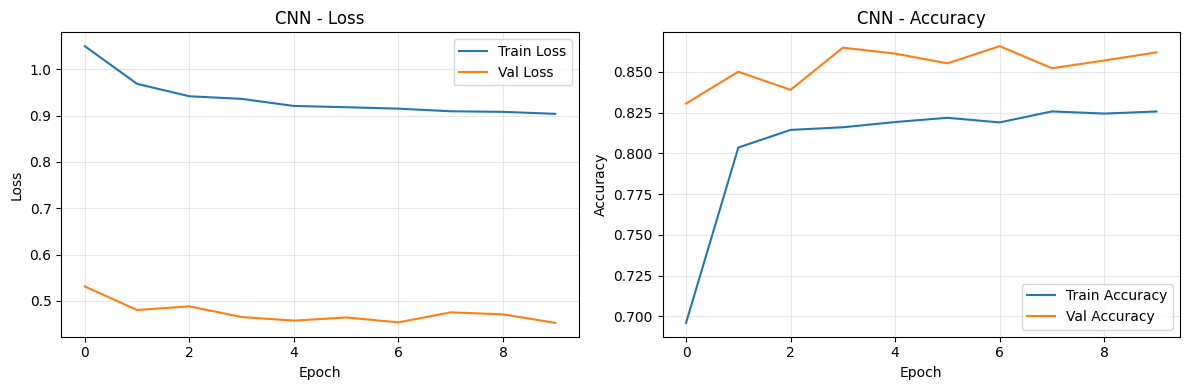


Evaluating CNN_1D...
Accuracy:    0.8306
Precision:   0.3982
Recall:      0.5553
F1-Score:    0.4638
ROC-AUC:     0.7686
PR-AUC:      0.5066
Specificity: 0.8724
Threshold:   0.5000

Confusion Matrix:
[[9135 1336]
 [ 708  884]]
  TN: 9,135 | FP: 1,336
  FN: 708 | TP: 884
Accuracy:    0.8306
Precision:   0.3982
Recall:      0.5553
F1-Score:    0.4638
ROC-AUC:     0.7686
PR-AUC:      0.5066
Specificity: 0.8724
Threshold:   0.5000

Confusion Matrix:
[[9135 1336]
 [ 708  884]]
  TN: 9,135 | FP: 1,336
  FN: 708 | TP: 884


In [11]:
print("\n" + "="*80)
print("TRAINING 1D CONVOLUTIONAL NEURAL NETWORK (CNN)")
print("="*80)

# Reshape data for CNN (samples, features, 1)
X_train_cnn = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val_cnn = X_val.values.reshape(X_val.shape[0], X_val.shape[1], 1)

# Build lighter CNN model (memory efficient)
cnn_model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(input_dim, 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    
    Conv1D(16, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    
    Flatten(),
    
    Dense(32, activation='relu'),
    Dropout(0.3),
    
    Dense(1, activation='sigmoid')
], name='CNN_1D')

# Compile
cnn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("\nCNN Architecture:")
cnn_model.summary()

# Train with smaller batch size to reduce memory usage
print("\nTraining CNN...")
cnn_history = cnn_model.fit(
    X_train_cnn, y_train,
    validation_data=(X_val_cnn, y_val),
    epochs=50,
    batch_size=512,
    class_weight=class_weights,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

print("\nCNN training complete")

# Plot training history
plot_training_history(cnn_history, 'CNN')

# Evaluate
cnn_metrics = evaluate_dl_model(cnn_model, X_val_cnn, y_val, 'CNN_1D')

### 4.3 Long Short-Term Memory (LSTM)


TRAINING LONG SHORT-TERM MEMORY (LSTM)

LSTM Architecture:


Model: "LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 63, 32)         │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 63, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,777 (30.38 KB)

 Trainable params: 7,777 (30.38 KB)

 Non-trainable params: 0 (0.00 B)


Training LSTM...
Epoch 1/50
Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 21s 137ms/step - accuracy: 0.8066 - loss: 1.0512 - val_accuracy: 0.8077 - val_loss: 0.5636 - learning_rate: 0.0010
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 21s 137ms/step - accuracy: 0.8066 - loss: 1.0512 - val_accuracy: 0.8077 - val_loss: 0.5636 - learning_rate: 0.0010
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 14s 128ms/step - accuracy: 0.8064 - loss: 0.9899 - val_accuracy: 0.8288 - val_loss: 0.5118 - learning_rate: 0.0010
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 14s 128ms/step - accuracy: 0.8064 - loss: 0.9899 - val_accuracy: 0.8288 - val_loss: 0.5118 - learning_rate: 0.0010
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 14s 128ms/step - accuracy: 0.7921 - loss: 0.9736 - val_accuracy: 0.8158 - val_loss: 0.5038 - learning_rate: 0.0010
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 14s 128ms/step - accuracy: 0.7921 - loss: 0.9736 - val_accuracy: 0.8158 - val_loss: 0.5038 - learning_rate: 0.0010
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1

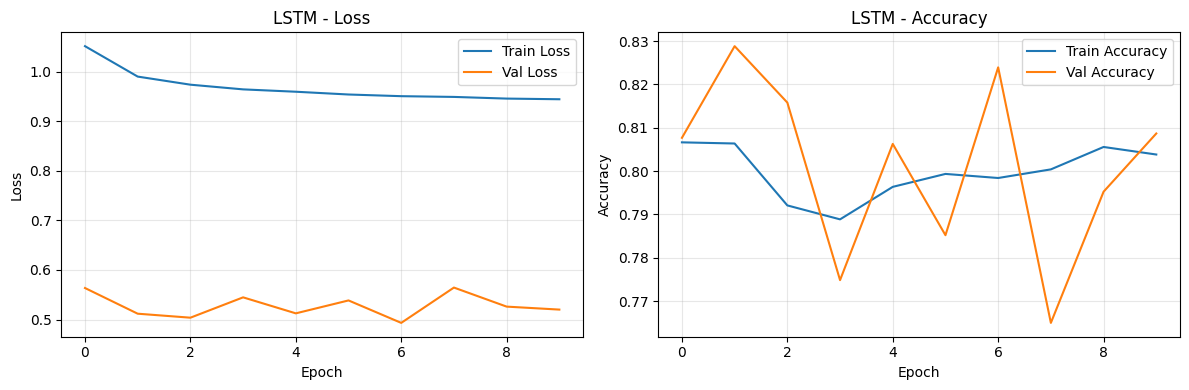


Evaluating LSTM...
Accuracy:    0.8077
Precision:   0.3505
Recall:      0.5358
F1-Score:    0.4237
ROC-AUC:     0.7618
PR-AUC:      0.4867
Specificity: 0.8490
Threshold:   0.5000

Confusion Matrix:
[[8890 1581]
 [ 739  853]]
  TN: 8,890 | FP: 1,581
  FN: 739 | TP: 853
Accuracy:    0.8077
Precision:   0.3505
Recall:      0.5358
F1-Score:    0.4237
ROC-AUC:     0.7618
PR-AUC:      0.4867
Specificity: 0.8490
Threshold:   0.5000

Confusion Matrix:
[[8890 1581]
 [ 739  853]]
  TN: 8,890 | FP: 1,581
  FN: 739 | TP: 853


In [12]:
print("\n" + "="*80)
print("TRAINING LONG SHORT-TERM MEMORY (LSTM)")
print("="*80)

# Reshape data for LSTM (samples, features, 1)
X_train_lstm = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val_lstm = X_val.values.reshape(X_val.shape[0], X_val.shape[1], 1)

# Build lighter LSTM model (memory efficient)
lstm_model = Sequential([
    LSTM(32, return_sequences=True, input_shape=(input_dim, 1)),
    Dropout(0.3),
    
    LSTM(16, return_sequences=False),
    Dropout(0.3),
    
    Dense(16, activation='relu'),
    Dropout(0.2),
    
    Dense(1, activation='sigmoid')
], name='LSTM')

# Compile
lstm_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("\nLSTM Architecture:")
lstm_model.summary()

# Train with larger batch size to reduce memory usage
print("\nTraining LSTM...")
lstm_history = lstm_model.fit(
    X_train_lstm, y_train,
    validation_data=(X_val_lstm, y_val),
    epochs=50,
    batch_size=512,
    class_weight=class_weights,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

print("\nLSTM training complete")

# Plot training history
plot_training_history(lstm_history, 'LSTM')

# Evaluate
lstm_metrics = evaluate_dl_model(lstm_model, X_val_lstm, y_val, 'LSTM')

### 4.4 Bidirectional LSTM (BiLSTM)


TRAINING BIDIRECTIONAL LSTM (BiLSTM)

Using reshaped data: (56296, 63, 1)

BiLSTM Architecture:


Model: "BiLSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 63, 64)         │         8,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 63, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 32)             │        10,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,617 (76.63 KB)

 Trainable params: 19,617 (76.63 KB)

 Non-trainable params: 0 (0.00 B)


Training BiLSTM...
Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 31s 188ms/step - accuracy: 0.8021 - loss: 1.0433 - val_accuracy: 0.7981 - val_loss: 0.5343 - learning_rate: 0.0010
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 31s 188ms/step - accuracy: 0.8021 - loss: 1.0433 - val_accuracy: 0.7981 - val_loss: 0.5343 - learning_rate: 0.0010
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 19s 168ms/step - accuracy: 0.7956 - loss: 0.9598 - val_accuracy: 0.7895 - val_loss: 0.5382 - learning_rate: 0.0010
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 19s 168ms/step - accuracy: 0.7956 - loss: 0.9598 - val_accuracy: 0.7895 - val_loss: 0.5382 - learning_rate: 0.0010
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 18s 160ms/step - accuracy: 0.7910 - loss: 0.9551 - val_accuracy: 0.8331 - val_loss: 0.4766 - learning_rate: 0.0010
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 18s 160ms/step - accuracy: 0.7910 - loss: 0.9551 - val_accuracy: 0.8331 - val_loss: 0.4766 - learning_rate: 0.0010
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 18s 164ms/

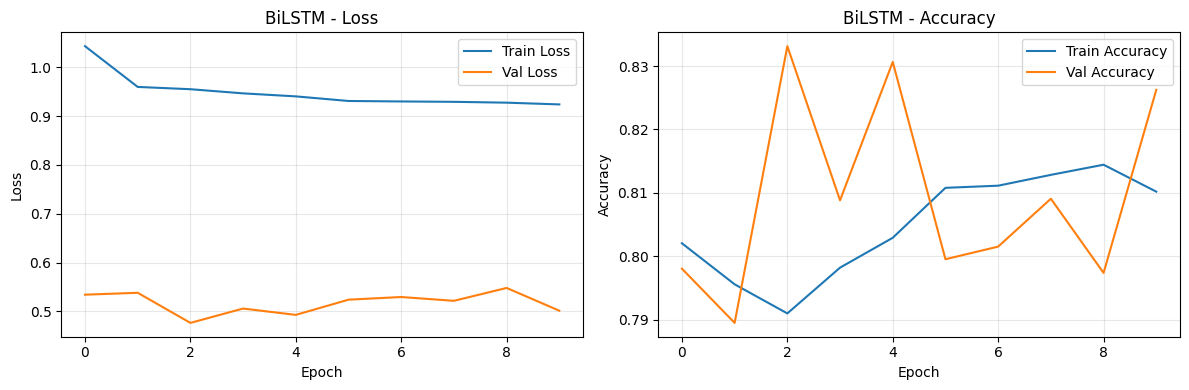


Evaluating BiLSTM...
Accuracy:    0.7981
Precision:   0.3465
Recall:      0.5986
F1-Score:    0.4390
ROC-AUC:     0.7805
PR-AUC:      0.5070
Specificity: 0.8284
Threshold:   0.5000

Confusion Matrix:
[[8674 1797]
 [ 639  953]]
  TN: 8,674 | FP: 1,797
  FN: 639 | TP: 953
Accuracy:    0.7981
Precision:   0.3465
Recall:      0.5986
F1-Score:    0.4390
ROC-AUC:     0.7805
PR-AUC:      0.5070
Specificity: 0.8284
Threshold:   0.5000

Confusion Matrix:
[[8674 1797]
 [ 639  953]]
  TN: 8,674 | FP: 1,797
  FN: 639 | TP: 953


In [13]:
print("\n" + "="*80)
print("TRAINING BIDIRECTIONAL LSTM (BiLSTM)")
print("="*80)

# Use same reshaped data as LSTM
print(f"\nUsing reshaped data: {X_train_lstm.shape}")

# Build BiLSTM model (memory efficient)
bilstm_model = Sequential([
    Bidirectional(LSTM(32, return_sequences=True), input_shape=(input_dim, 1)),
    Dropout(0.3),
    
    Bidirectional(LSTM(16, return_sequences=False)),
    Dropout(0.3),
    
    Dense(16, activation='relu'),
    Dropout(0.2),
    
    Dense(1, activation='sigmoid')
], name='BiLSTM')

# Compile
bilstm_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("\nBiLSTM Architecture:")
bilstm_model.summary()

# Train with larger batch size to reduce memory usage
print("\nTraining BiLSTM...")
bilstm_history = bilstm_model.fit(
    X_train_lstm, y_train,
    validation_data=(X_val_lstm, y_val),
    epochs=50,
    batch_size=512,
    class_weight=class_weights,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

print("\nBiLSTM training complete")

# Plot training history
plot_training_history(bilstm_history, 'BiLSTM')

# Evaluate
bilstm_metrics = evaluate_dl_model(bilstm_model, X_val_lstm, y_val, 'BiLSTM')

### 4.5 CNN-BiLSTM Hybrid Model


TRAINING CNN-BiLSTM HYBRID MODEL

Using reshaped data: (56296, 63, 1)

CNN-BiLSTM Architecture:


Model: "CNN_BiLSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 61, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 30, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 30, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 30, 64)         │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 32)             │        10,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,737 (112.25 KB)

 Trainable params: 28,737 (112.25 KB)

 Non-trainable params: 0 (0.00 B)


Training CNN-BiLSTM hybrid model...
Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 22s 98ms/step - accuracy: 0.7984 - loss: 1.0391 - val_accuracy: 0.8398 - val_loss: 0.5027 - learning_rate: 0.0010
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 22s 98ms/step - accuracy: 0.7984 - loss: 1.0391 - val_accuracy: 0.8398 - val_loss: 0.5027 - learning_rate: 0.0010
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - accuracy: 0.7999 - loss: 0.9794 - val_accuracy: 0.7845 - val_loss: 0.5689 - learning_rate: 0.0010
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - accuracy: 0.7999 - loss: 0.9794 - val_accuracy: 0.7845 - val_loss: 0.5689 - learning_rate: 0.0010
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.7975 - loss: 0.9644 - val_accuracy: 0.8234 - val_loss: 0.5095 - learning_rate: 0.0010
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.7975 - loss: 0.9644 - val_accuracy: 0.8234 - val_loss: 0.5095 - learning_rate: 0.0010
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 9s 

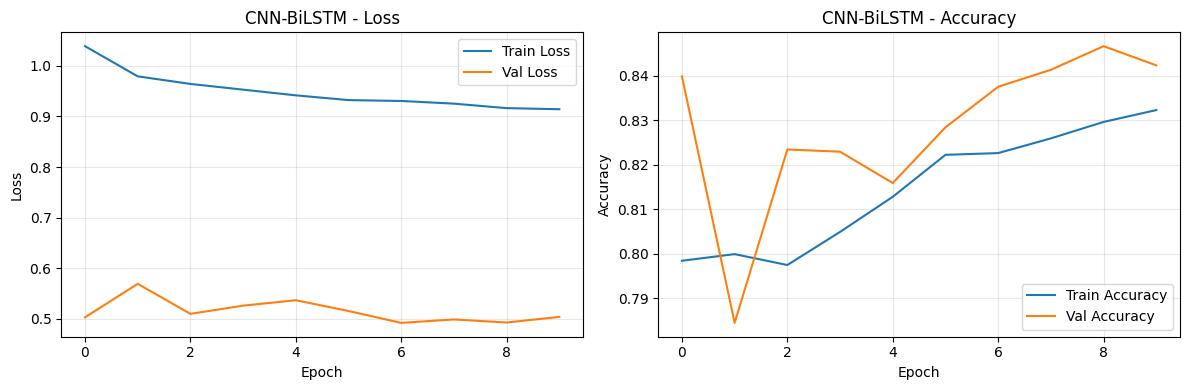


Evaluating CNN_BiLSTM...
Accuracy:    0.8398
Precision:   0.4122
Recall:      0.5013
F1-Score:    0.4524
ROC-AUC:     0.7686
PR-AUC:      0.4946
Specificity: 0.8913
Threshold:   0.5000

Confusion Matrix:
[[9333 1138]
 [ 794  798]]
  TN: 9,333 | FP: 1,138
  FN: 794 | TP: 798
Accuracy:    0.8398
Precision:   0.4122
Recall:      0.5013
F1-Score:    0.4524
ROC-AUC:     0.7686
PR-AUC:      0.4946
Specificity: 0.8913
Threshold:   0.5000

Confusion Matrix:
[[9333 1138]
 [ 794  798]]
  TN: 9,333 | FP: 1,138
  FN: 794 | TP: 798


In [14]:
print("\n" + "="*80)
print("TRAINING CNN-BiLSTM HYBRID MODEL")
print("="*80)

# Use reshaped data (same as LSTM/BiLSTM)
print(f"\nUsing reshaped data: {X_train_lstm.shape}")

# Build CNN-BiLSTM Hybrid model (memory efficient)
cnn_bilstm_model = Sequential([
    # CNN layers for feature extraction
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(input_dim, 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    
    # BiLSTM layers for sequence learning
    Bidirectional(LSTM(32, return_sequences=True)),
    Dropout(0.3),
    
    Bidirectional(LSTM(16, return_sequences=False)),
    Dropout(0.3),
    
    # Dense layers for classification
    Dense(32, activation='relu'),
    Dropout(0.2),
    
    Dense(16, activation='relu'),
    Dropout(0.2),
    
    Dense(1, activation='sigmoid')
], name='CNN_BiLSTM')

# Compile
cnn_bilstm_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("\nCNN-BiLSTM Architecture:")
cnn_bilstm_model.summary()

# Train
print("\nTraining CNN-BiLSTM hybrid model...")
cnn_bilstm_history = cnn_bilstm_model.fit(
    X_train_lstm, y_train,
    validation_data=(X_val_lstm, y_val),
    epochs=50,
    batch_size=512,
    class_weight=class_weights,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

print("\nCNN-BiLSTM training complete")

# Plot training history
plot_training_history(cnn_bilstm_history, 'CNN-BiLSTM')

# Evaluate
cnn_bilstm_metrics = evaluate_dl_model(cnn_bilstm_model, X_val_lstm, y_val, 'CNN_BiLSTM')

### 4.6 Autoencoder (Anomaly Detection)


TRAINING AUTOENCODER (ANOMALY DETECTION)

Training on normal transactions: 48,866 samples

Autoencoder Architecture:


Model: "Autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 63)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoder (Sequential)            │ (None, 16)             │         7,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoder (Sequential)            │ (None, 63)             │         7,135 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,223 (55.56 KB)

 Trainable params: 13,839 (54.06 KB)

 Non-trainable params: 384 (1.50 KB)


Training Autoencoder on normal transactions...
Epoch 1/50
Epoch 1/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.8863 - val_loss: 0.7682 - learning_rate: 0.0010
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.8863 - val_loss: 0.7682 - learning_rate: 0.0010
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6979 - val_loss: 0.6331 - learning_rate: 0.0010
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6979 - val_loss: 0.6331 - learning_rate: 0.0010
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6348 - val_loss: 0.5991 - learning_rate: 0.0010
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6348 - val_loss: 0.5991 - learning_rate: 0.0010
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6133 - val_loss: 0.5851 - learning_rate: 0.0010
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6133 - val_loss: 0.5851 - learning_rate: 0.0010
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.6036 - val_loss

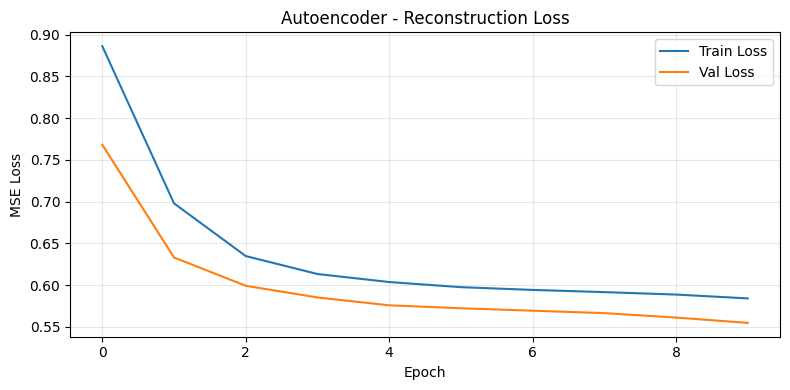


Calculating reconstruction errors...
Reconstruction error threshold (95th percentile): 1.691502

Autoencoder Evaluation:
Accuracy:  0.8596
Precision: 0.4461
Recall:    0.2651
F1-Score:  0.3325

Confusion Matrix:
[[9947  524]
 [1170  422]]
Reconstruction error threshold (95th percentile): 1.691502

Autoencoder Evaluation:
Accuracy:  0.8596
Precision: 0.4461
Recall:    0.2651
F1-Score:  0.3325

Confusion Matrix:
[[9947  524]
 [1170  422]]


In [15]:
print("\n" + "="*80)
print("TRAINING AUTOENCODER (ANOMALY DETECTION)")
print("="*80)

# Train on normal transactions only
X_train_normal = X_train[y_train == 0]
print(f"\nTraining on normal transactions: {X_train_normal.shape[0]:,} samples")

# Build Autoencoder
encoding_dim = 16

# Encoder
encoder = Sequential([
    Dense(64, activation='relu', input_dim=input_dim),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(encoding_dim, activation='relu')
], name='Encoder')

# Decoder
decoder = Sequential([
    Dense(32, activation='relu', input_dim=encoding_dim),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(input_dim, activation='sigmoid')
], name='Decoder')

# Full Autoencoder
autoencoder_input = Input(shape=(input_dim,))
encoded = encoder(autoencoder_input)
decoded = decoder(encoded)
autoencoder_model = Model(autoencoder_input, decoded, name='Autoencoder')

# Compile
autoencoder_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse'
)

print("\nAutoencoder Architecture:")
autoencoder_model.summary()

# Train on normal data
print("\nTraining Autoencoder on normal transactions...")
autoencoder_history = autoencoder_model.fit(
    X_train_normal, X_train_normal,
    validation_split=0.1,
    epochs=50,
    batch_size=512,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

print("\nAutoencoder training complete")

# Plot training history
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(autoencoder_history.history['loss'], label='Train Loss')
ax.plot(autoencoder_history.history['val_loss'], label='Val Loss')
ax.set_title('Autoencoder - Reconstruction Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('MSE Loss')
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate reconstruction error on validation set
print("\nCalculating reconstruction errors...")
X_val_pred = autoencoder_model.predict(X_val, verbose=0)
reconstruction_errors = np.mean(np.square(X_val.values - X_val_pred), axis=1)

# Find threshold (95th percentile of normal transaction errors)
normal_errors = reconstruction_errors[y_val == 0]
threshold = np.percentile(normal_errors, 95)
print(f"Reconstruction error threshold (95th percentile): {threshold:.6f}")

# Classify based on threshold
y_pred = (reconstruction_errors > threshold).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, zero_division=0)
recall = recall_score(y_val, y_pred, zero_division=0)
f1 = f1_score(y_val, y_pred, zero_division=0)

print(f"\nAutoencoder Evaluation:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

cm = confusion_matrix(y_val, y_pred)
print(f"\nConfusion Matrix:")
print(cm)

autoencoder_metrics = {
    'model_name': 'Autoencoder',
    'accuracy': float(accuracy),
    'precision': float(precision),
    'recall': float(recall),
    'f1_score': float(f1),
    'roc_auc': None,
    'confusion_matrix': cm.tolist(),
    'threshold': float(threshold)
}

---
## 5. Model Comparison

In [16]:
print("\n" + "="*80)
print("DL MODEL COMPARISON SUMMARY")
print("="*80)

# Collect all metrics
all_dl_metrics = [
    fnn_metrics,
    cnn_metrics,
    lstm_metrics,
    bilstm_metrics,
    cnn_bilstm_metrics,
    autoencoder_metrics
]

# Create comparison dataframe
comparison_df = pd.DataFrame(all_dl_metrics)
comparison_df = comparison_df[['model_name', 'accuracy', 'precision', 'recall', 'f1_score', 'roc_auc', 'pr_auc', 'specificity']]

print("\n")
print(comparison_df.to_string(index=False))

# Find best model by F1-score
best_model_idx = comparison_df['f1_score'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'model_name']
best_f1 = comparison_df.loc[best_model_idx, 'f1_score']

print(f"\n" + "="*80)
print(f"Best Model: {best_model_name} (F1-Score: {best_f1:.4f})")
print("="*80)


DL MODEL COMPARISON SUMMARY


 model_name  accuracy  precision   recall  f1_score  roc_auc   pr_auc  specificity
        FNN  0.880875   0.541510 0.635050  0.584562 0.862943 0.672308     0.918250
     CNN_1D  0.830556   0.398198 0.555276  0.463799 0.768648 0.506559     0.872410
       LSTM  0.807676   0.350452 0.535804  0.423746 0.761849 0.486691     0.849012
     BiLSTM  0.798060   0.346545 0.598618  0.438968 0.780462 0.506961     0.828383
 CNN_BiLSTM  0.839841   0.412190 0.501256  0.452381 0.768572 0.494577     0.891319
Autoencoder  0.859571   0.446089 0.265075  0.332545      NaN      NaN          NaN

Best Model: FNN (F1-Score: 0.5846)


## 6. Visualization - Model Comparison


Creating comparison charts...
Chart saved: dl_models_comparison.png
Chart saved: dl_models_comparison.png


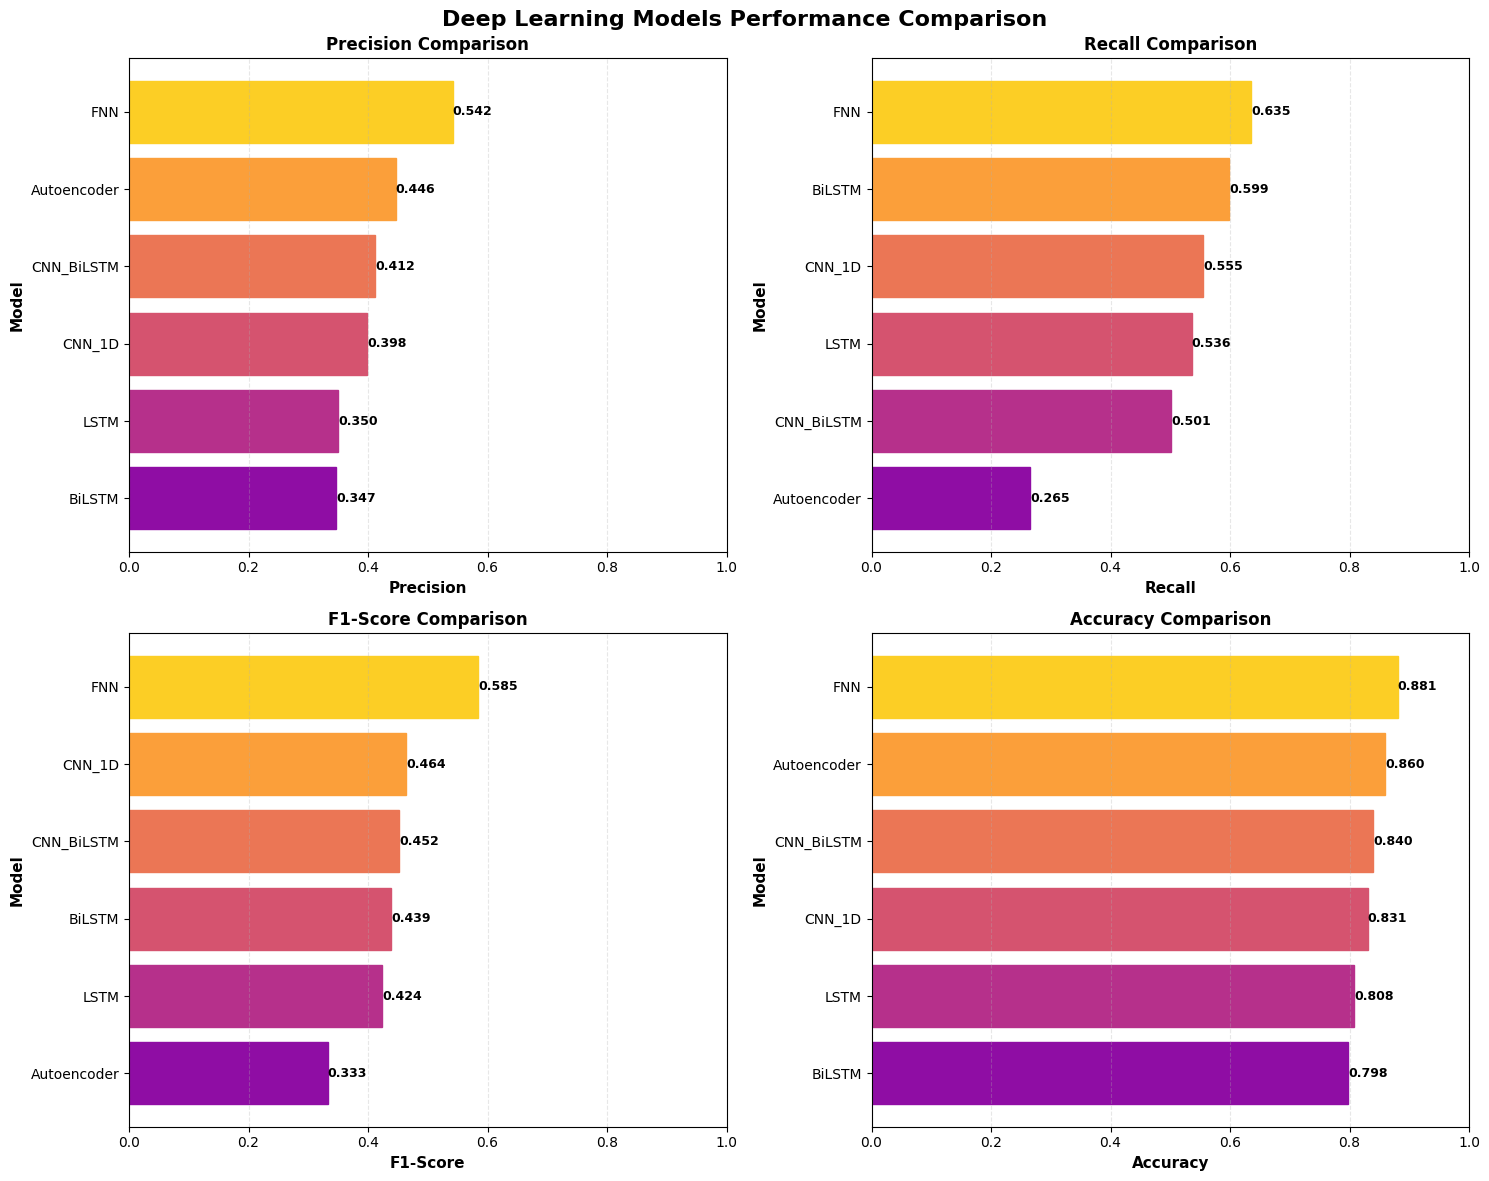

In [17]:
print("\nCreating comparison charts...")

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Deep Learning Models Performance Comparison', fontsize=16, fontweight='bold')

# Metrics to plot
metrics_to_plot = ['precision', 'recall', 'f1_score', 'accuracy']
titles = ['Precision', 'Recall', 'F1-Score', 'Accuracy']

# Plot each metric
for idx, (metric, title) in enumerate(zip(metrics_to_plot, titles)):
    ax = axes[idx // 2, idx % 2]
    
    # Sort by metric value
    sorted_df = comparison_df.sort_values(by=metric, ascending=True)
    
    # Create horizontal bar chart
    bars = ax.barh(sorted_df['model_name'], sorted_df[metric])
    
    # Color bars
    colors = plt.cm.plasma(np.linspace(0.3, 0.9, len(bars)))
    for bar, color in zip(bars, colors):
        bar.set_color(color)
    
    # Add value labels
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2, 
                f'{width:.3f}', 
                ha='left', va='center', fontweight='bold', fontsize=9)
    
    ax.set_xlabel(title, fontsize=11, fontweight='bold')
    ax.set_ylabel('Model', fontsize=11, fontweight='bold')
    ax.set_title(f'{title} Comparison', fontsize=12, fontweight='bold')
    ax.set_xlim(0, 1.0)
    ax.grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('dl_models_comparison.png', dpi=300, bbox_inches='tight')
print("Chart saved: dl_models_comparison.png")
plt.show()


Creating ROC and Precision-Recall curves...
ROC and PR curves saved: dl_roc_pr_curves.png
ROC and PR curves saved: dl_roc_pr_curves.png


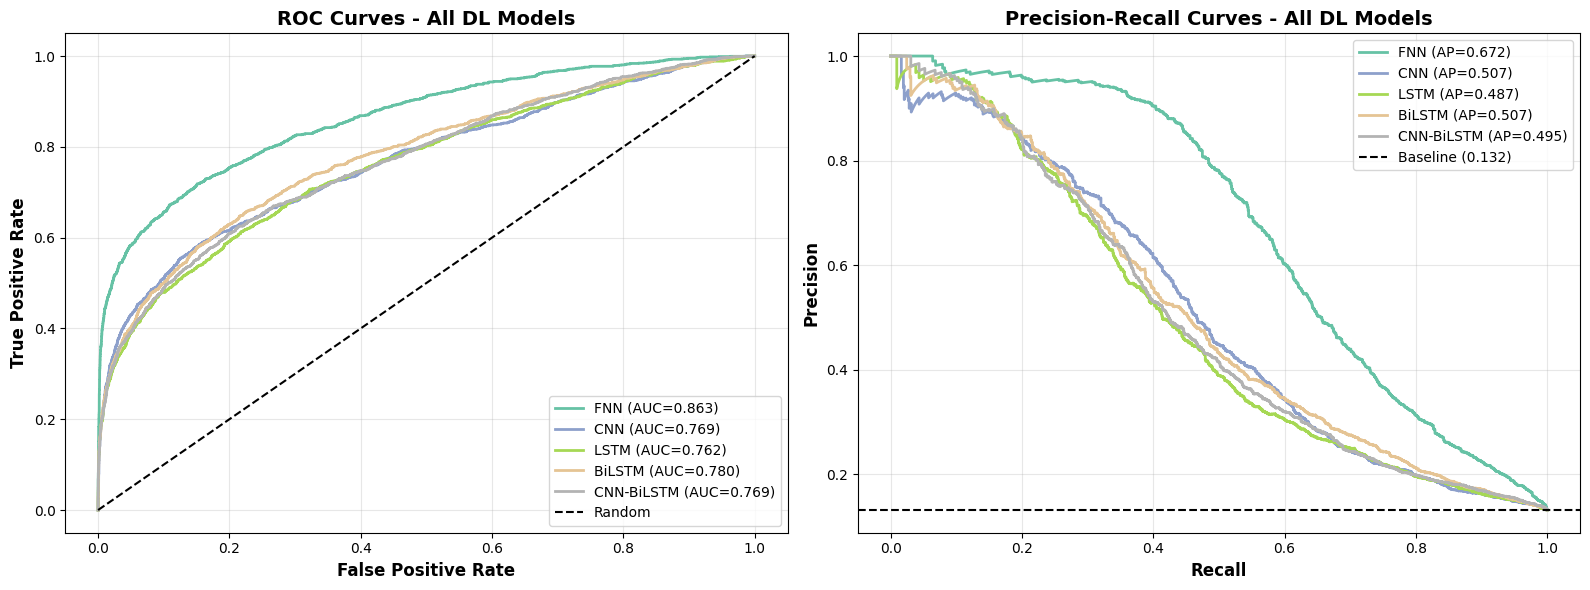

In [18]:
print("\nCreating ROC and Precision-Recall curves...")

# Create dictionary of models for plotting
models_dict = {
    'FNN': fnn_model,
    'CNN': cnn_model,
    'LSTM': lstm_model,
    'BiLSTM': bilstm_model,
    'CNN-BiLSTM': cnn_bilstm_model
}

# Prepare data for each model type
X_val_reshaped_cnn = X_val.values.reshape(X_val.shape[0], X_val.shape[1], 1)
X_val_reshaped_lstm = X_val.values.reshape(X_val.shape[0], X_val.shape[1], 1)

# Plot curves using appropriate data shape for each model
from sklearn.metrics import roc_curve, precision_recall_curve, average_precision_score

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

colors = plt.cm.Set2(np.linspace(0, 1, 5))

# FNN
y_pred = fnn_model.predict(X_val, verbose=0).flatten()
fpr, tpr, _ = roc_curve(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)
ax1.plot(fpr, tpr, label=f'FNN (AUC={roc_auc:.3f})', color=colors[0], linewidth=2)
precision, recall, _ = precision_recall_curve(y_val, y_pred)
pr_auc = average_precision_score(y_val, y_pred)
ax2.plot(recall, precision, label=f'FNN (AP={pr_auc:.3f})', color=colors[0], linewidth=2)

# CNN
y_pred = cnn_model.predict(X_val_reshaped_cnn, verbose=0).flatten()
fpr, tpr, _ = roc_curve(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)
ax1.plot(fpr, tpr, label=f'CNN (AUC={roc_auc:.3f})', color=colors[1], linewidth=2)
precision, recall, _ = precision_recall_curve(y_val, y_pred)
pr_auc = average_precision_score(y_val, y_pred)
ax2.plot(recall, precision, label=f'CNN (AP={pr_auc:.3f})', color=colors[1], linewidth=2)

# LSTM
y_pred = lstm_model.predict(X_val_reshaped_lstm, verbose=0).flatten()
fpr, tpr, _ = roc_curve(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)
ax1.plot(fpr, tpr, label=f'LSTM (AUC={roc_auc:.3f})', color=colors[2], linewidth=2)
precision, recall, _ = precision_recall_curve(y_val, y_pred)
pr_auc = average_precision_score(y_val, y_pred)
ax2.plot(recall, precision, label=f'LSTM (AP={pr_auc:.3f})', color=colors[2], linewidth=2)

# BiLSTM
y_pred = bilstm_model.predict(X_val_reshaped_lstm, verbose=0).flatten()
fpr, tpr, _ = roc_curve(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)
ax1.plot(fpr, tpr, label=f'BiLSTM (AUC={roc_auc:.3f})', color=colors[3], linewidth=2)
precision, recall, _ = precision_recall_curve(y_val, y_pred)
pr_auc = average_precision_score(y_val, y_pred)
ax2.plot(recall, precision, label=f'BiLSTM (AP={pr_auc:.3f})', color=colors[3], linewidth=2)

# CNN-BiLSTM
y_pred = cnn_bilstm_model.predict(X_val_reshaped_lstm, verbose=0).flatten()
fpr, tpr, _ = roc_curve(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)
ax1.plot(fpr, tpr, label=f'CNN-BiLSTM (AUC={roc_auc:.3f})', color=colors[4], linewidth=2)
precision, recall, _ = precision_recall_curve(y_val, y_pred)
pr_auc = average_precision_score(y_val, y_pred)
ax2.plot(recall, precision, label=f'CNN-BiLSTM (AP={pr_auc:.3f})', color=colors[4], linewidth=2)

# ROC plot formatting
ax1.plot([0, 1], [0, 1], 'k--', label='Random', linewidth=1.5)
ax1.set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
ax1.set_ylabel('True Positive Rate', fontsize=12, fontweight='bold')
ax1.set_title('ROC Curves - All DL Models', fontsize=14, fontweight='bold')
ax1.legend(loc='lower right', fontsize=10)
ax1.grid(alpha=0.3)

# PR plot formatting
fraud_ratio = np.sum(y_val) / len(y_val)
ax2.axhline(y=fraud_ratio, color='k', linestyle='--', label=f'Baseline ({fraud_ratio:.3f})', linewidth=1.5)
ax2.set_xlabel('Recall', fontsize=12, fontweight='bold')
ax2.set_ylabel('Precision', fontsize=12, fontweight='bold')
ax2.set_title('Precision-Recall Curves - All DL Models', fontsize=14, fontweight='bold')
ax2.legend(loc='best', fontsize=10)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('dl_roc_pr_curves.png', dpi=300, bbox_inches='tight')
print("ROC and PR curves saved: dl_roc_pr_curves.png")
plt.show()

## 7. Hyperparameter Tuning for Best Models

In [19]:
print("\n" + "="*80)
print("HYPERPARAMETER TUNING")
print("="*80)

# Select top 2 models for tuning
top_models = comparison_df.nlargest(2, 'f1_score')['model_name'].tolist()
print(f"\nTuning top 2 models: {top_models}")


HYPERPARAMETER TUNING

Tuning top 2 models: ['FNN', 'CNN_1D']


### 7.1 Tune FNN

In [20]:
if 'FNN' in top_models:
    print("\nTuning FNN...")
    
    # Try different architectures
    best_fnn_f1 = fnn_metrics['f1_score']
    best_fnn_model = fnn_model
    best_fnn_params = "baseline"
    
    # Configuration 1: Deeper network
    print("\n  Testing Config 1: Deeper network...")
    fnn_tuned_1 = Sequential([
        Dense(256, activation='relu', input_dim=input_dim),
        BatchNormalization(),
        Dropout(0.3),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    
    fnn_tuned_1.compile(
        optimizer=Adam(learning_rate=0.0005),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    fnn_tuned_1.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=30,
        batch_size=256,
        class_weight=class_weights,
        callbacks=[early_stop],
        verbose=0
    )
    
    metrics_1 = evaluate_dl_model(fnn_tuned_1, X_val, y_val, 'FNN_Tuned_Config1')
    
    if metrics_1['f1_score'] > best_fnn_f1:
        best_fnn_f1 = metrics_1['f1_score']
        best_fnn_model = fnn_tuned_1
        best_fnn_params = "Config1: Deeper (256-128-64-32)"
    
    # Configuration 2: Lower dropout
    print("\n  Testing Config 2: Lower dropout...")
    fnn_tuned_2 = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        BatchNormalization(),
        Dropout(0.2),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.1),
        Dense(1, activation='sigmoid')
    ])
    
    fnn_tuned_2.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    fnn_tuned_2.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=30,
        batch_size=256,
        class_weight=class_weights,
        callbacks=[early_stop],
        verbose=0
    )
    
    metrics_2 = evaluate_dl_model(fnn_tuned_2, X_val, y_val, 'FNN_Tuned_Config2')
    
    if metrics_2['f1_score'] > best_fnn_f1:
        best_fnn_f1 = metrics_2['f1_score']
        best_fnn_model = fnn_tuned_2
        best_fnn_params = "Config2: Lower dropout (0.2-0.2-0.1)"
    
    print(f"\n  Best FNN Configuration: {best_fnn_params}")
    print(f"  Best F1-Score: {best_fnn_f1:.4f}")
    
    fnn_tuned_metrics = evaluate_dl_model(best_fnn_model, X_val, y_val, 'FNN_Tuned')
else:
    print("\nSkipping FNN tuning (not in top 2)")
    fnn_tuned_metrics = None


Tuning FNN...

  Testing Config 1: Deeper network...

Evaluating FNN_Tuned_Config1...

Evaluating FNN_Tuned_Config1...
Accuracy:    0.8611
Precision:   0.4784
Recall:      0.5760
F1-Score:    0.5227
ROC-AUC:     0.8092
PR-AUC:      0.5721
Specificity: 0.9045
Threshold:   0.5000

Confusion Matrix:
[[9471 1000]
 [ 675  917]]
  TN: 9,471 | FP: 1,000
  FN: 675 | TP: 917

  Testing Config 2: Lower dropout...
Accuracy:    0.8611
Precision:   0.4784
Recall:      0.5760
F1-Score:    0.5227
ROC-AUC:     0.8092
PR-AUC:      0.5721
Specificity: 0.9045
Threshold:   0.5000

Confusion Matrix:
[[9471 1000]
 [ 675  917]]
  TN: 9,471 | FP: 1,000
  FN: 675 | TP: 917

  Testing Config 2: Lower dropout...

Evaluating FNN_Tuned_Config2...

Evaluating FNN_Tuned_Config2...
Accuracy:    0.8531
Precision:   0.4584
Recall:      0.6237
F1-Score:    0.5285
ROC-AUC:     0.8262
PR-AUC:      0.6079
Specificity: 0.8880
Threshold:   0.5000

Confusion Matrix:
[[9298 1173]
 [ 599  993]]
  TN: 9,298 | FP: 1,173
  FN: 59

### 7.2 Tune CNN

In [21]:
if 'CNN_1D' in top_models:
    print("\nTuning CNN...")
    
    best_cnn_f1 = cnn_metrics['f1_score']
    best_cnn_model = cnn_model
    best_cnn_params = "baseline"
    
    # Configuration 1: More filters
    print("\n  Testing Config 1: More filters...")
    cnn_tuned_1 = Sequential([
        Conv1D(128, kernel_size=3, activation='relu', input_shape=(input_dim, 1)),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        Conv1D(64, kernel_size=3, activation='relu'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    
    cnn_tuned_1.compile(
        optimizer=Adam(learning_rate=0.0005),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    cnn_tuned_1.fit(
        X_train_cnn, y_train,
        validation_data=(X_val_cnn, y_val),
        epochs=30,
        batch_size=256,
        class_weight=class_weights,
        callbacks=[early_stop],
        verbose=0
    )
    
    metrics_1 = evaluate_dl_model(cnn_tuned_1, X_val_cnn, y_val, 'CNN_Tuned_Config1')
    
    if metrics_1['f1_score'] > best_cnn_f1:
        best_cnn_f1 = metrics_1['f1_score']
        best_cnn_model = cnn_tuned_1
        best_cnn_params = "Config1: More filters (128-64)"
    
    print(f"\n  Best CNN Configuration: {best_cnn_params}")
    print(f"  Best F1-Score: {best_cnn_f1:.4f}")
    
    cnn_tuned_metrics = evaluate_dl_model(best_cnn_model, X_val_cnn, y_val, 'CNN_Tuned')
else:
    print("\nSkipping CNN tuning (not in top 2)")
    cnn_tuned_metrics = None


Tuning CNN...

  Testing Config 1: More filters...

Evaluating CNN_Tuned_Config1...

Evaluating CNN_Tuned_Config1...
Accuracy:    0.8989
Precision:   0.7660
Recall:      0.3373
F1-Score:    0.4684
ROC-AUC:     0.7717
PR-AUC:      0.5459
Specificity: 0.9843
Threshold:   0.5000

Confusion Matrix:
[[10307   164]
 [ 1055   537]]
  TN: 10,307 | FP: 164
  FN: 1,055 | TP: 537

  Best CNN Configuration: Config1: More filters (128-64)
  Best F1-Score: 0.4684

Evaluating CNN_Tuned...
Accuracy:    0.8989
Precision:   0.7660
Recall:      0.3373
F1-Score:    0.4684
ROC-AUC:     0.7717
PR-AUC:      0.5459
Specificity: 0.9843
Threshold:   0.5000

Confusion Matrix:
[[10307   164]
 [ 1055   537]]
  TN: 10,307 | FP: 164
  FN: 1,055 | TP: 537

  Best CNN Configuration: Config1: More filters (128-64)
  Best F1-Score: 0.4684

Evaluating CNN_Tuned...
Accuracy:    0.8989
Precision:   0.7660
Recall:      0.3373
F1-Score:    0.4684
ROC-AUC:     0.7717
PR-AUC:      0.5459
Specificity: 0.9843
Threshold:   0.500

### 7.3 Tune LSTM

In [22]:
if 'LSTM' in top_models:
    print("\nTuning LSTM...")
    
    best_lstm_f1 = lstm_metrics['f1_score']
    best_lstm_model = lstm_model
    best_lstm_params = "baseline"
    
    # Configuration 1: Larger LSTM units
    print("\n  Testing Config 1: Larger units...")
    lstm_tuned_1 = Sequential([
        LSTM(128, return_sequences=True, input_shape=(input_dim, 1)),
        BatchNormalization(),
        Dropout(0.3),
        LSTM(64, return_sequences=False),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    
    lstm_tuned_1.compile(
        optimizer=Adam(learning_rate=0.0005),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    lstm_tuned_1.fit(
        X_train_lstm, y_train,
        validation_data=(X_val_lstm, y_val),
        epochs=30,
        batch_size=256,
        class_weight=class_weights,
        callbacks=[early_stop],
        verbose=0
    )
    
    metrics_1 = evaluate_dl_model(lstm_tuned_1, X_val_lstm, y_val, 'LSTM_Tuned_Config1')
    
    if metrics_1['f1_score'] > best_lstm_f1:
        best_lstm_f1 = metrics_1['f1_score']
        best_lstm_model = lstm_tuned_1
        best_lstm_params = "Config1: Larger units (128-64)"
    
    print(f"\n  Best LSTM Configuration: {best_lstm_params}")
    print(f"  Best F1-Score: {best_lstm_f1:.4f}")
    
    lstm_tuned_metrics = evaluate_dl_model(best_lstm_model, X_val_lstm, y_val, 'LSTM_Tuned')
else:
    print("\nSkipping LSTM tuning (not in top 2)")
    lstm_tuned_metrics = None


Skipping LSTM tuning (not in top 2)


### 7.4 Tune BiLSTM

In [23]:
if 'BiLSTM' in top_models:
    print("\nTuning BiLSTM...")
    
    best_bilstm_f1 = bilstm_metrics['f1_score']
    best_bilstm_model = bilstm_model
    best_bilstm_params = "baseline"
    
    # Configuration 1: Larger BiLSTM units
    print("\n  Testing Config 1: Larger units...")
    bilstm_tuned_1 = Sequential([
        Bidirectional(LSTM(64, return_sequences=True), input_shape=(input_dim, 1)),
        Dropout(0.3),
        Bidirectional(LSTM(32, return_sequences=False)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    
    bilstm_tuned_1.compile(
        optimizer=Adam(learning_rate=0.0005),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    bilstm_tuned_1.fit(
        X_train_lstm, y_train,
        validation_data=(X_val_lstm, y_val),
        epochs=30,
        batch_size=512,
        class_weight=class_weights,
        callbacks=[early_stop],
        verbose=0
    )
    
    metrics_1 = evaluate_dl_model(bilstm_tuned_1, X_val_lstm, y_val, 'BiLSTM_Tuned_Config1')
    
    if metrics_1['f1_score'] > best_bilstm_f1:
        best_bilstm_f1 = metrics_1['f1_score']
        best_bilstm_model = bilstm_tuned_1
        best_bilstm_params = "Config1: Larger units (64-32)"
    
    print(f"\n  Best BiLSTM Configuration: {best_bilstm_params}")
    print(f"  Best F1-Score: {best_bilstm_f1:.4f}")
    
    bilstm_tuned_metrics = evaluate_dl_model(best_bilstm_model, X_val_lstm, y_val, 'BiLSTM_Tuned')
else:
    print("\nSkipping BiLSTM tuning (not in top 2)")
    bilstm_tuned_metrics = None


Skipping BiLSTM tuning (not in top 2)


### 7.5 Tune CNN-BiLSTM Hybrid

In [24]:
if 'CNN_BiLSTM' in top_models:
    print("\nTuning CNN-BiLSTM Hybrid...")
    
    best_hybrid_f1 = cnn_bilstm_metrics['f1_score']
    best_hybrid_model = cnn_bilstm_model
    best_hybrid_params = "baseline"
    
    # Configuration 1: Deeper architecture
    print("\n  Testing Config 1: Deeper architecture...")
    hybrid_tuned_1 = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(input_dim, 1)),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        Bidirectional(LSTM(64, return_sequences=True)),
        Dropout(0.3),
        Bidirectional(LSTM(32, return_sequences=False)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    
    hybrid_tuned_1.compile(
        optimizer=Adam(learning_rate=0.0005),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    hybrid_tuned_1.fit(
        X_train_lstm, y_train,
        validation_data=(X_val_lstm, y_val),
        epochs=30,
        batch_size=512,
        class_weight=class_weights,
        callbacks=[early_stop],
        verbose=0
    )
    
    metrics_1 = evaluate_dl_model(hybrid_tuned_1, X_val_lstm, y_val, 'CNN_BiLSTM_Tuned_Config1')
    
    if metrics_1['f1_score'] > best_hybrid_f1:
        best_hybrid_f1 = metrics_1['f1_score']
        best_hybrid_model = hybrid_tuned_1
        best_hybrid_params = "Config1: Deeper (64-64-32)"
    
    # Configuration 2: More CNN filters
    print("\n  Testing Config 2: More CNN filters...")
    hybrid_tuned_2 = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(input_dim, 1)),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        Conv1D(32, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        Bidirectional(LSTM(32, return_sequences=False)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    
    hybrid_tuned_2.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    hybrid_tuned_2.fit(
        X_train_lstm, y_train,
        validation_data=(X_val_lstm, y_val),
        epochs=30,
        batch_size=512,
        class_weight=class_weights,
        callbacks=[early_stop],
        verbose=0
    )
    
    metrics_2 = evaluate_dl_model(hybrid_tuned_2, X_val_lstm, y_val, 'CNN_BiLSTM_Tuned_Config2')
    
    if metrics_2['f1_score'] > best_hybrid_f1:
        best_hybrid_f1 = metrics_2['f1_score']
        best_hybrid_model = hybrid_tuned_2
        best_hybrid_params = "Config2: More CNN filters (64-32)"
    
    print(f"\n  Best CNN-BiLSTM Configuration: {best_hybrid_params}")
    print(f"  Best F1-Score: {best_hybrid_f1:.4f}")
    
    cnn_bilstm_tuned_metrics = evaluate_dl_model(best_hybrid_model, X_val_lstm, y_val, 'CNN_BiLSTM_Tuned')
else:
    print("\nSkipping CNN-BiLSTM tuning (not in top 2)")
    cnn_bilstm_tuned_metrics = None


Skipping CNN-BiLSTM tuning (not in top 2)


## 8. Final Model Selection

In [25]:
print("\n" + "="*80)
print("FINAL MODEL SELECTION")
print("="*80)

# Add tuned models to comparison
tuned_metrics = [m for m in [fnn_tuned_metrics, cnn_tuned_metrics, lstm_tuned_metrics, bilstm_tuned_metrics, cnn_bilstm_tuned_metrics] if m is not None]
final_dl_metrics = all_dl_metrics + tuned_metrics

# Create final comparison
final_comparison = pd.DataFrame(final_dl_metrics)
final_comparison = final_comparison[['model_name', 'accuracy', 'precision', 'recall', 'f1_score', 'roc_auc', 'pr_auc', 'specificity']]
final_comparison = final_comparison.sort_values('f1_score', ascending=False)

print("\nFinal Model Rankings (by F1-Score):\n")
print(final_comparison.to_string(index=False))

# Best model
best_final_model = final_comparison.iloc[0]
print(f"\n" + "="*80)
print(f"BEST MODEL: {best_final_model['model_name']}")
print("="*80)
print(f"F1-Score:  {best_final_model['f1_score']:.4f}")
print(f"Recall:    {best_final_model['recall']:.4f}")
print(f"Precision: {best_final_model['precision']:.4f}")
if best_final_model['roc_auc']:
    print(f"ROC-AUC:   {best_final_model['roc_auc']:.4f}")


FINAL MODEL SELECTION

Final Model Rankings (by F1-Score):

 model_name  accuracy  precision   recall  f1_score  roc_auc   pr_auc  specificity
        FNN  0.880875   0.541510 0.635050  0.584562 0.862943 0.672308     0.918250
  FNN_Tuned  0.880875   0.541510 0.635050  0.584562 0.862943 0.672308     0.918250
  CNN_Tuned  0.898947   0.766049 0.337312  0.468382 0.771680 0.545866     0.984338
     CNN_1D  0.830556   0.398198 0.555276  0.463799 0.768648 0.506559     0.872410
 CNN_BiLSTM  0.839841   0.412190 0.501256  0.452381 0.768572 0.494577     0.891319
     BiLSTM  0.798060   0.346545 0.598618  0.438968 0.780462 0.506961     0.828383
       LSTM  0.807676   0.350452 0.535804  0.423746 0.761849 0.486691     0.849012
Autoencoder  0.859571   0.446089 0.265075  0.332545      NaN      NaN          NaN

BEST MODEL: FNN
F1-Score:  0.5846
Recall:    0.6351
Precision: 0.5415
ROC-AUC:   0.8629


## 9. Save Results and Models

In [26]:
print("\n" + "="*80)
print("SAVING RESULTS AND MODELS")
print("="*80)

# Create output directories
os.makedirs('saved_models', exist_ok=True)
os.makedirs('results', exist_ok=True)

# Save comparison results
final_comparison.to_csv('results/dl_models_comparison.csv', index=False)
print("\nResults saved: results/dl_models_comparison.csv")

# Save as JSON
with open('results/dl_models_metrics.json', 'w') as f:
    json.dump(final_dl_metrics, f, indent=2)
print("Results saved: results/dl_models_metrics.json")

# Save trained models
print("\nSaving trained models...")

fnn_model.save('saved_models/fnn_model.keras')
print("Saved: fnn_model.keras")

cnn_model.save('saved_models/cnn_model.keras')
print("Saved: cnn_model.keras")

lstm_model.save('saved_models/lstm_model.keras')
print("Saved: lstm_model.keras")

bilstm_model.save('saved_models/bilstm_model.keras')
print("Saved: bilstm_model.keras")

cnn_bilstm_model.save('saved_models/cnn_bilstm_model.keras')
print("Saved: cnn_bilstm_model.keras")

autoencoder_model.save('saved_models/autoencoder_model.keras')
print("Saved: autoencoder_model.keras")

# Save tuned models if they exist
if fnn_tuned_metrics:
    best_fnn_model.save('saved_models/fnn_tuned_model.keras')
    print("Saved: fnn_tuned_model.keras")

if cnn_tuned_metrics:
    best_cnn_model.save('saved_models/cnn_tuned_model.keras')
    print("Saved: cnn_tuned_model.keras")

if lstm_tuned_metrics:
    best_lstm_model.save('saved_models/lstm_tuned_model.keras')
    print("Saved: lstm_tuned_model.keras")

if bilstm_tuned_metrics:
    best_bilstm_model.save('saved_models/bilstm_tuned_model.keras')
    print("Saved: bilstm_tuned_model.keras")

if cnn_bilstm_tuned_metrics:
    best_hybrid_model.save('saved_models/cnn_bilstm_tuned_model.keras')
    print("Saved: cnn_bilstm_tuned_model.keras")

print("\nAll models and results saved successfully")


SAVING RESULTS AND MODELS

Results saved: results/dl_models_comparison.csv
Results saved: results/dl_models_metrics.json

Saving trained models...
Saved: fnn_model.keras
Saved: fnn_model.keras
Saved: cnn_model.keras
Saved: lstm_model.keras
Saved: bilstm_model.keras
Saved: cnn_model.keras
Saved: lstm_model.keras
Saved: bilstm_model.keras
Saved: cnn_bilstm_model.keras
Saved: autoencoder_model.keras
Saved: fnn_tuned_model.keras
Saved: cnn_bilstm_model.keras
Saved: autoencoder_model.keras
Saved: fnn_tuned_model.keras
Saved: cnn_tuned_model.keras

All models and results saved successfully
Saved: cnn_tuned_model.keras

All models and results saved successfully


## 10. Summary

In [27]:
print("\n" + "="*80)
print("DEEP LEARNING TRAINING PIPELINE COMPLETE")
print("="*80)

summary_text = f"""
SUMMARY:

Models Trained: 6
- Feedforward Neural Network (FNN)
- 1D Convolutional Neural Network (CNN)
- Long Short-Term Memory (LSTM)
- Bidirectional LSTM (BiLSTM)
- CNN-BiLSTM Hybrid (Combined)
- Autoencoder (Anomaly Detection)

Best Model: {best_final_model['model_name']}
F1-Score: {best_final_model['f1_score']:.4f}
Recall: {best_final_model['recall']:.4f}
Precision: {best_final_model['precision']:.4f}

Files Created:
- results/dl_models_comparison.csv
- results/dl_models_metrics.json
- dl_models_comparison.png
- saved_models/ (6+ model files)

Next Steps:
1. Review model comparison chart
2. Analyze confusion matrices
3. Test best model on test set
4. Create hybrid fusion ensemble (ML + DL)
5. Final model deployment

Completed at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
"""

print(summary_text)

# Save summary
with open('results/dl_training_summary.txt', 'w') as f:
    f.write(summary_text)

print("="*80)
print("TRAINING COMPLETE")
print("="*80)


DEEP LEARNING TRAINING PIPELINE COMPLETE

SUMMARY:

Models Trained: 6
- Feedforward Neural Network (FNN)
- 1D Convolutional Neural Network (CNN)
- Long Short-Term Memory (LSTM)
- Bidirectional LSTM (BiLSTM)
- CNN-BiLSTM Hybrid (Combined)
- Autoencoder (Anomaly Detection)

Best Model: FNN
F1-Score: 0.5846
Recall: 0.6351
Precision: 0.5415

Files Created:
- results/dl_models_comparison.csv
- results/dl_models_metrics.json
- dl_models_comparison.png
- saved_models/ (6+ model files)

Next Steps:
1. Review model comparison chart
2. Analyze confusion matrices
3. Test best model on test set
4. Create hybrid fusion ensemble (ML + DL)
5. Final model deployment

Completed at: 2025-10-09 21:36:21

TRAINING COMPLETE


---
## Training Complete

**Models Trained:** 6 Deep Learning models  
**Hyperparameter Tuning:** Top 2 models tuned  
**Results:** Saved in results/ folder  
**Models:** Saved in saved_models/ folder  
**Visualization:** dl_models_comparison.png  

**Next:** Create hybrid fusion ensemble combining ML and DL models